<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Numerical-Methods-for-Solving-Differential-Equations" data-toc-modified-id="Numerical-Methods-for-Solving-Differential-Equations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Numerical Methods for Solving Differential Equations</a></span><ul class="toc-item"><li><span><a href="#Part-1:-Numerical-Methods" data-toc-modified-id="Part-1:-Numerical-Methods-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Part 1: Numerical Methods</a></span><ul class="toc-item"><li><span><a href="#Euler's-Method-(Predictor)" data-toc-modified-id="Euler's-Method-(Predictor)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Euler's Method (Predictor)</a></span></li><li><span><a href="#Heun's-Method-(Predictor-Corrector)" data-toc-modified-id="Heun's-Method-(Predictor-Corrector)-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Heun's Method (Predictor-Corrector)</a></span></li><li><span><a href="#RK4" data-toc-modified-id="RK4-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>RK4</a></span></li><li><span><a href="#RK4-v.2" data-toc-modified-id="RK4-v.2-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>RK4 v.2</a></span></li><li><span><a href="#RK4-v.3-(most-elegant-code)" data-toc-modified-id="RK4-v.3-(most-elegant-code)-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>RK4 v.3 (most elegant code)</a></span></li><li><span><a href="#Interpolation-with-Python" data-toc-modified-id="Interpolation-with-Python-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Interpolation with Python</a></span><ul class="toc-item"><li><span><a href="#Testing-Polynomial-Interpolation" data-toc-modified-id="Testing-Polynomial-Interpolation-1.1.6.1"><span class="toc-item-num">1.1.6.1&nbsp;&nbsp;</span>Testing Polynomial Interpolation</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#PSAM-Math-Lab-9b:-Initial-Value-Problem-Applications" data-toc-modified-id="PSAM-Math-Lab-9b:-Initial-Value-Problem-Applications-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PSAM Math Lab 9b: Initial Value Problem Applications</a></span><ul class="toc-item"><li><span><a href="#Solving-Homogenous-2nd-order-LODEs-Numerically" data-toc-modified-id="Solving-Homogenous-2nd-order-LODEs-Numerically-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Solving Homogenous 2nd order LODEs Numerically</a></span><ul class="toc-item"><li><span><a href="#Try-it-out:" data-toc-modified-id="Try-it-out:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Try it out:</a></span></li></ul></li><li><span><a href="#Solving-Non-Homogenous-2nd-order-LODEs-Numerically" data-toc-modified-id="Solving-Non-Homogenous-2nd-order-LODEs-Numerically-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Solving Non-Homogenous 2nd order LODEs Numerically</a></span></li><li><span><a href="#Problem:-A-Simple-Pendulum-(success)" data-toc-modified-id="Problem:-A-Simple-Pendulum-(success)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Problem: A Simple Pendulum (success)</a></span></li><li><span><a href="#Problem:-Hanging-Wire-(Success)" data-toc-modified-id="Problem:-Hanging-Wire-(Success)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Problem: Hanging Wire (Success)</a></span></li><li><span><a href="#Problem:-Compartmental-Analysis" data-toc-modified-id="Problem:-Compartmental-Analysis-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Problem: Compartmental Analysis</a></span></li></ul></li></ul></div>

Components of this lab have been adapted from: http://calculuslab.deltacollege.edu/ODE/ODE-h.html

__Goals:__

1) Use Euler's Method to produce a numerical solution to a differential equation.

2) Use Python to implement Euler's Method, then Heun's Method.

3) See the Runge-Kutta method and its relationship to Euler's Method and Heun's Method.

4) Apply your experience solving differential equations to several interesting situations.

## Numerical Methods for Solving Differential Equations

### Part 1: Numerical Methods

#### Euler's Method (Predictor)

Here is the formula for Euler's Method:

$$y' = F(x, y) $$

$$h = dy = F(x, y) dx$$

$$y(x_0) = y_0$$

$$y_n = y_{n-1} + h F(x_{n-1}, y_{n-1})$$

In [38]:
def eulers_method(f, dx, y0, x0, i):
    n = 0; data = [[x0, y0]]
    while n <= i:
        n+=1
        x = data[n-1][0]
        y = data[n-1][1]
        dy = dx*f(x, y) #this is actually dy/dx
        data.append([x + dx, y + dy])
    return np.asarray(data)

f = lambda x, y: y

In [39]:
eulers_method(f, 1, 1, 0, 5)

array([[ 0,  1],
       [ 1,  2],
       [ 2,  4],
       [ 3,  8],
       [ 4, 16],
       [ 5, 32],
       [ 6, 64]])

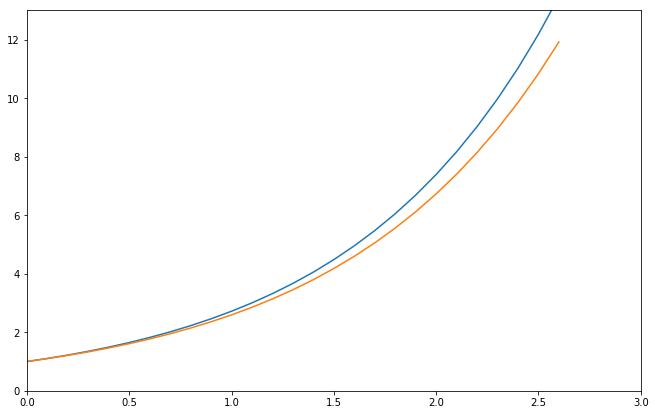

In [44]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph

t = np.arange(0, 5, 0.1)
x = t
y = np.exp(x)
ax.plot(x, y)

data = eulers_method(f, 0.1, 1, 0, 25)
ax.plot(data[:, 0], data[:, 1])

ax.set_xlim(0, 3)
ax.set_ylim(0, 13)

plt.show()

#### Heun's Method (Predictor-Corrector)

For a rigorous explanation of exactly what is happening, follow <a href="http://calculuslab.deltacollege.edu/ODE/7-C-2/7-C-2-h.html">here</a>

We adjust Euler's Method as follows:

$$ x_{n} = x_{n-1} + h$$
$$y_{n} = y_{n-1} + (h/2) (f(x_{n-1}, y_{n-1}) + f(x_{n-1} + h, y_{n-1} +  h f(x_{n-1}, y_{n-1})))$$

In [2]:
def heuns_method(f, dx, y0, x0, i):
    n = 0; data = [[x0, y0]]
    while n <= i:
        n+=1
        x = data[n-1][0]
        y = data[n-1][1]
        dy = (dx/2)*(f(x, y) + f(x+dx, y+dx*f(x, y)))
        data.append([x + dx, y + dy])
    return np.asarray(data)

f = lambda x, y: y

In [3]:
heuns_method(f, 0.1, 1, 0, 5)

array([[0.        , 1.        ],
       [0.1       , 1.105     ],
       [0.2       , 1.221025  ],
       [0.3       , 1.34923262],
       [0.4       , 1.49090205],
       [0.5       , 1.64744677],
       [0.6       , 1.82042868]])

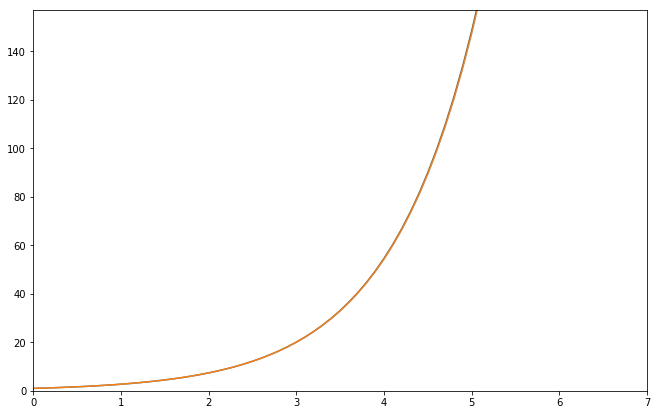

In [4]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph

t = np.arange(0, 10, 0.1)
x = t
y = np.exp(x)
ax.plot(x, y)

data = heuns_method(f, 0.1, 1, 0, 250)
ax.plot(data[:, 0], data[:, 1])

ax.set_xlim(0, 7)
ax.set_ylim(0, 157)

plt.show()

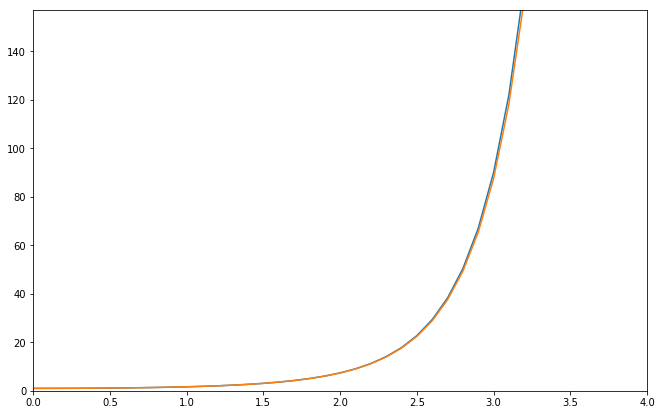

In [17]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph

t = np.arange(0, 10, 0.1)
x = t
y = np.exp(0.5*x**2)
ax.plot(x, y)

f = lambda x, y: x*y
data = heuns_method(f, 0.1, 1, 0, 250)
ax.plot(data[:, 0], data[:, 1])

ax.set_xlim(0, 4)
ax.set_ylim(0, 157)

plt.show()

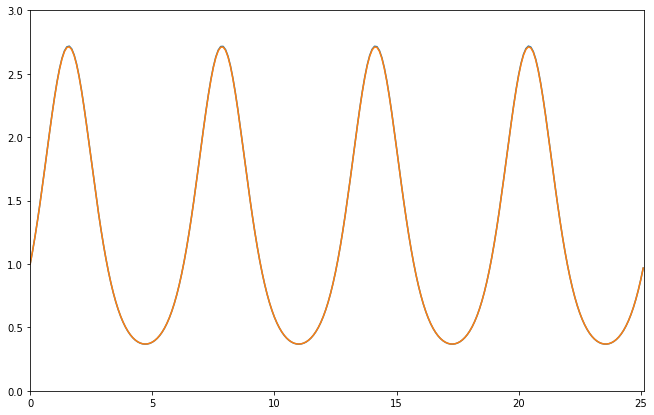

the fit is so close that you cant see two distinct curves!


In [27]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph

t = np.arange(0, 8*np.pi, 0.1)
x = t
y = np.exp(np.sin(x))
ax.plot(x, y)

f = lambda x, y: y*np.cos(x)
data = heuns_method(f, 0.1, 1, 0, 250)
ax.plot(data[:, 0], data[:, 1])

ax.set_xlim(0, 8*np.pi)
ax.set_ylim(0, 3)

plt.show()
print("the fit is so close that you cant see two distinct curves!")

#### RK4
*Source: https://rosettacode.org/wiki/Runge-Kutta_method#Python*

*Definition of N-th Degree Runge-Kutta Method found in this text: https://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h10/kompendiet/kap13.pdf*

In [4]:
def RK4(f):
    return lambda t, y, dt: (
            lambda dy1: (
                lambda dy2: (
                    lambda dy3: (
                        lambda dy4: (dy1 + 2*dy2 + 2*dy3 + dy4)/6
                        )( dt * f( t + dt  , y + dy3   ) )
                    )( dt * f( t + dt/2, y + dy2/2 ) )
            )( dt * f( t + dt/2, y + dy1/2 ) )
    )( dt * f( t       , y         ) )
 
def theory(t): return (t**2 + 4)**2 /16
 
from math import sqrt
dy = RK4(lambda t, y: t*sqrt(y))
 
t, y, dt = 0., 1., .1
while t <= 10:
    if abs(round(t) - t) < 1e-5:
        print("y(%2.1f)\t= %4.6f \t error: %4.6g" % ( t, y, abs(y - theory(t))))
    t, y = t + dt, y + dy( t, y, dt )

y(0.0)	= 1.000000 	 error:    0
y(1.0)	= 1.562500 	 error: 1.45722e-07
y(2.0)	= 3.999999 	 error: 9.19479e-07
y(3.0)	= 10.562497 	 error: 2.90956e-06
y(4.0)	= 24.999994 	 error: 6.23491e-06
y(5.0)	= 52.562489 	 error: 1.08197e-05
y(6.0)	= 99.999983 	 error: 1.65946e-05
y(7.0)	= 175.562476 	 error: 2.35177e-05
y(8.0)	= 288.999968 	 error: 3.15652e-05
y(9.0)	= 451.562459 	 error: 4.07232e-05
y(10.0)	= 675.999949 	 error: 5.09833e-05


#### RK4 v.2
*Source: https://rosettacode.org/wiki/Runge-Kutta_method#Python*

In [2]:
from math import sqrt
 
def rk4(f, x0, y0, x1, n):
    vx = [0] * (n + 1)
    vy = [0] * (n + 1)
    h = (x1 - x0) / float(n)
    vx[0] = x = x0
    vy[0] = y = y0
    for i in range(1, n + 1):
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * f(x + h, y + k3)
        vx[i] = x = x0 + i * h
        vy[i] = y = y + (k1 + k2 + k2 + k3 + k3 + k4) / 6
    return vx, vy
 
def f(x, y):
    return x * sqrt(y)
 
vx, vy = rk4(f, 0, 1, 10, 100)
for x, y in list(zip(vx, vy))[::10]:
    print("%4.1f %10.5f %+12.4e" % (x, y, y - (4 + x * x)**2 / 16))

 0.0    1.00000  +0.0000e+00
 1.0    1.56250  -1.4572e-07
 2.0    4.00000  -9.1948e-07
 3.0   10.56250  -2.9096e-06
 4.0   24.99999  -6.2349e-06
 5.0   52.56249  -1.0820e-05
 6.0   99.99998  -1.6595e-05
 7.0  175.56248  -2.3518e-05
 8.0  288.99997  -3.1565e-05
 9.0  451.56246  -4.0723e-05
10.0  675.99995  -5.0983e-05


#### RK4 v.3 (most elegant code)

*Source: __Numerical Methods for Engineers__ by Leif Rune Hellevik, Department of Structural Engineering, NTNU, Jan 26, 2018*

In [5]:
# 4th Order Runge-kutta method for solving differential equations numerically
 def rk4(func, z0, time):
    """The Runge-Kutta 4 scheme for solution of systems of ODEs.
    z0 is a vector for the initial conditions,
    the right hand side of the system is represented by func which returns
    a vector with the same size as z0 ."""
    z = np.zeros((np.size(time),np.size(z0)))
    z[0,:] = z0
    zp = np.zeros_like(z0)
    for i, t in enumerate(time[0:-1]):
        dt = time[i+1] - time[i]
        dt2 = dt/2.0
        k1 = np.asarray(func(z[i,:], t)) # predictor step 1
        k2 = np.asarray(func(z[i,:] + k1*dt2, t + dt2)) # predictor step 2
        k3 = np.asarray(func(z[i,:] + k2*dt2, t + dt2)) # predictor step 3
        k4 = np.asarray(func(z[i,:] + k3*dt, t + dt)) # predictor step 4
        z[i+1,:] = z[i,:] + dt/6.0*(k1 + 2.0*k2 + 2.0*k3 + k4) # Corrector step

#### Interpolation with Python

1. Brief mathematical explanation of interpolation for physical modeling:
https://www.astro.umass.edu/~schloerb/ph281/Lectures/Interpolation/Interpolation.pdf
<br /><br />
2. For many types of interpolation, including multivariate (surface / heatmap):
https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
https://physicalmodelingwithpython.blogspot.com/2015/06/interpolation.html
<br /><br />
3. For fast, easy, 1D interpolation that doesn't venture beyond Numpy:
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.interp.html
<br /><br />
4. For Numpy's fast polynomial interpolation that returns an array of coefficients:
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html
*Note that higher order polynomials can get pretty crazy and wiggly. See link  in overfitting/underfitting.*
<br /><br />
5. Overfitting vs. Underfitting
https://scikit-learn.org/0.17/auto_examples/model_selection/plot_underfitting_overfitting.html
<br /><br />
6. Poltly's Examples:
https://plot.ly/python/interpolation-and-extrapolation-in-1d/
<br /><br />
7. 3D Interpolation using spline interpolation:
https://stackoverflow.com/questions/46040382/spline-interpolation-in-3d-in-python
<br /><br />
8. Extremely powerful library for interpolating lines, surfaces, and volumes.
https://pypi.org/project/Splipy/
 - Documentation: https://sintefmath.github.io/Splipy/factories.html?highlight=interpolate#splipy.curve_factory.interpolate

##### Testing Polynomial Interpolation

In [28]:
#help(np.polyfit)

###### Test 1: Simple Exponential

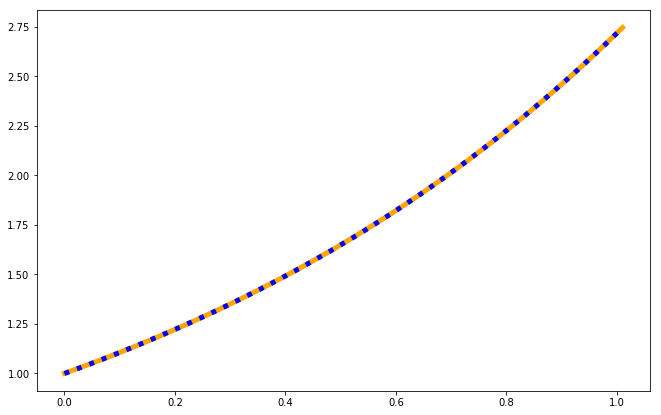

As we can see, that's a pretty exact fit. But its also a very simple function.


In [107]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph

# Approximate Function using Heun's Method
f = lambda x, y: y
data = heuns_method(f, 0.01, 1, 0, 100)
ax.plot(data[:, 0], data[:, 1], color='orange', linewidth=5)

# Interpolate Function using Polynomials
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg = 3)  # polynomial degree (number of coefficients)

y = np.polyval(c, data[:, 0])
ax.plot(data[:, 0], y, color='blue', linestyle=':', linewidth=5)

#ax.set_xlim(0, 4)
#ax.set_ylim(1, 45)

plt.show()
print("As we can see, that's a pretty exact fit. But its also a very simple function.")

###### Test 2: Small portion of periodic function

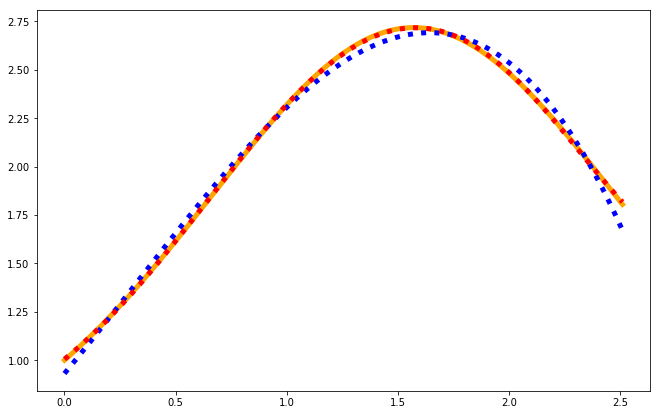

In [109]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph

# Approximate Function using Heun's Method
f = lambda x, y: y*np.cos(x)
data = heuns_method(f, 0.01, 1, 0, 250)
ax.plot(data[:, 0], data[:, 1], color='orange', linewidth=5)



# Interpolate Function using 3rd Degree Polynomial (BLUE)
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg = 3)  # polynomial degree (number of coefficients)

y = np.polyval(c, data[:, 0])
ax.plot(data[:, 0], y, color='blue', linestyle=':', linewidth=5)



# Interpolate Function using 5th Degree Polynomial (RED)
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg = 5)  # polynomial degree (number of coefficients)

y = np.polyval(c, data[:, 0])
ax.plot(data[:, 0], y, color='red', linestyle=':', linewidth=5)

plt.show()

###### Test 3: Several Periods of Periodic Function

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:42: RankWarning: Polyfit may be poorly conditioned


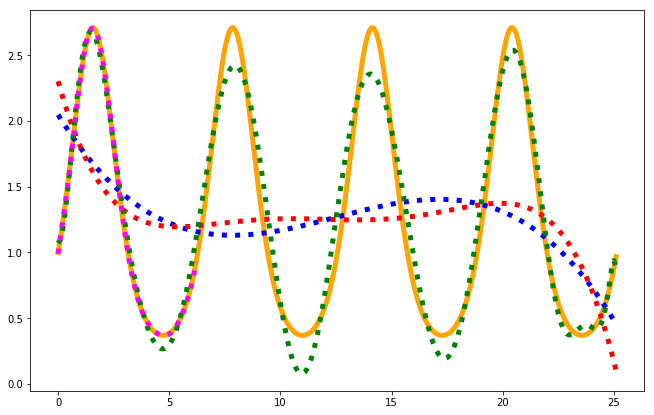

In [126]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph

# Approximate Function using Heun's Method
f = lambda x, y: y*np.cos(x)
data = heuns_method(f, 0.1, 1, 0, 250)
ax.plot(data[:, 0], data[:, 1], color='orange', linewidth=5)



# Interpolate Function using 3rd Degree Polynomial (BLUE)
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg = 3)  # polynomial degree (number of coefficients)

y = np.polyval(c, data[:, 0])
ax.plot(data[:, 0], y, color='blue', linestyle=':', linewidth=5)



# Interpolate Function using 5th Degree Polynomial (RED)
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg = 5)  # polynomial degree (number of coefficients)

y = np.polyval(c, data[:, 0])
ax.plot(data[:, 0], y, color='red', linestyle=':', linewidth=5)



# Interpolate Function using 20th Degree Polynomial (GREEN)
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg = 20)  # polynomial degree (number of coefficients)

y = np.polyval(c, data[:, 0])
ax.plot(data[:, 0], y, color='green', linestyle=':', linewidth=5)



# Interpolate Shorter Interval using 10th Degree Polynomial (MAGENTA)
    ## Polynomial Coefficients
c = np.polyfit(x = data[0:int(round(len(data)/4)), 0],   # x-values
               y = data[0:int(round(len(data)/4)):, 1],   # y-values
               deg = 10)  # polynomial degree (number of coefficients)

y = np.polyval(c, data[0:int(round(len(data)/4)), 0])
ax.plot(data[0:int(round(len(data)/4)), 0], y, color='magenta', linestyle=':', linewidth=5)

plt.show()

The green dashed curve is amazingly close, but isn't close enough. It is a 20th degree polynomial and doesn't get any more accurate in this case.

The blue and red curves are lower-degree polynomials. Comparing them to the magenta dashed curve (10th degree) shows that interpolating over smaller intervals of curves containing many fluctuations will give the most accurate results. Entire periodic functions can be modeled piecewise in this way.

## PSAM Math Lab 9b: Initial Value Problem Applications

### Solving Homogenous 2nd order LODEs Numerically
<a href='https://math.oregonstate.edu/home/programs/undergrad/CalculusQuestStudyGuides/ode/second/so_num/so_num.html'>The text below copied directly from this Oregon State University page.</a>

Consider the second-order ODE:

$$y'' = f(t, y, y')$$ $$y'(t_0)=y'_0$$ $$y(t_0)=y_0$$

Suppose the goal is solve the problem on the interval $(t_0, T)$. The 
following list summarizes the steps in solving the problem by Euler'
method.

 - Convert the second-order ode into two first-order ode. Let
$v=y'$. Then the two odes are

$$y' = v$$ $$y(t_0)=y_0$$

$$v' = f(t, y, v)$$ $$v(t_0) = y'_0$$


Discretize the interval $(t_0, T)$. Pick a bunch of points 
$t_0 < t_1 < t_2 < ... < t_N = T$. The points need not be equispaced.
Let $z_k$ denote the approximation to $y(t_k)$ and let $w_k$ denote the 
approximation to $v(t_k)$.

Use the formulas

$$z_{k+1} = z_k + (t_{k+1} - t_k)v_k$$
$$z_0 = y_0$$
$$v_{k+1} = v_k + (t_{k+1} - t_k) f(t, z_k, v_k)$$
$$v_0 = y'_0$$


to compute the approximate solution for k=0,1,2,...

Here is <a href='https://www.youtube.com/watch?v=YAo8Yo3zY6M'>a video showing this process applied to mass-on-sprng system.</a>

#### Try it out:
Problem from <a href='http://calculuslab.deltacollege.edu/ODE/7-4/7-4-1-ma.html'>this page.</a><br />

$$y″ - 3y′ - 10y = 0$$ $$y(0) = 0$$  $$y′(0) = 1$$

To think about solving this numerically with Heun's Method, we simplify the problem and first think about solving using Euler's method.

__Let__ 

$$f(t, y, y') = y'' = 3y' + 10y$$

$$y(t_0) = y'_0 = 1$$

$$y(t_0) = y_0 = 0$$

__Make the substitution:__

$$v(t) = y'(t)$$  $$v'(t) = y''(t)$$  $$v(0) = y'(0) = 1$$

__Then we have__  

$$v' = f(t, y, y') = 3v + 10y$$

__And finally, what we want is:__

$$y_{n+1} = y_n + \Delta t v_n$$
$$v_{n+1} = v_n + \Delta t v'_n =  v_n + \Delta t f(t, y, y')$$
$$v_{n+1}= v_n + \Delta t (3v + 10y)$$

__First we define a new Euler's Method function for second-order linear diff-eq's:__

In [12]:
import numpy as np

def eulers_method(f, dt, y0, v0, t0, i): # v = y-prime
    n = 0; data = [[t0, y0, v0]]
    while n <= i:
        n+=1
        t = data[n-1][0]
        y = data[n-1][1]
        v = data[n-1][2]
        y_new = y + (dt)*v
        v_new = v + (dt)*(f(t, y, v))
        data.append([t + dt, y_new, v_new])
    return np.asarray(data)

In [13]:
f_ = lambda t, y, v: 3*v + 10*y

eulers_method(f_, dt = 1, y0 = 0, v0 = 1, t0 = 0, i = 5)

array([[    0,     0,     1],
       [    1,     1,     4],
       [    2,     5,    26],
       [    3,    31,   154],
       [    4,   185,   926],
       [    5,  1111,  5554],
       [    6,  6665, 33326]])

__Then we step it up and define a new Heun's Method function for second-order linear diff-eq's:__

In [14]:
import numpy as np

def heuns_method(f, dt, y0, v0, t0, i): # v = y-prime
    n = 0; data = [[t0, y0, v0]]
    while n <= i:
        n+=1
        t = data[n-1][0]
        y = data[n-1][1]
        v = data[n-1][2]
        y_new = y + (dt)*(v)
        v_new = v + (dt/2)*(f(t, y, v) + f(t+dt, y_new, v + dt*f(t, y, v)))
        data.append([t + dt, y_new, v_new])
    return np.asarray(data)

In [15]:
f_ = lambda t, y, v: 3*v + 10*y

heuns_method(f_, dt = 1, y0 = 0, v0 = 1, t0 = 0, i = 5)

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.35000000e+01],
       [2.00000000e+00, 1.45000000e+01, 2.07250000e+02],
       [3.00000000e+00, 2.21750000e+02, 3.16037500e+03],
       [4.00000000e+00, 3.38212500e+03, 4.82088125e+04],
       [5.00000000e+00, 5.15909375e+04, 7.35372094e+05],
       [6.00000000e+00, 7.86963031e+05, 1.12172967e+07]])

In [16]:
f = lambda t, y, v: 3*v + 10*y
data = eulers_method(f, dt = 0.01, y0 = 0, v0 = 1, t0 = -1, i = 200)
data

array([[-1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-9.90000000e-01,  1.00000000e-02,  1.03000000e+00],
       [-9.80000000e-01,  2.03000000e-02,  1.06190000e+00],
       [-9.70000000e-01,  3.09190000e-02,  1.09578700e+00],
       [-9.60000000e-01,  4.18768700e-02,  1.13175251e+00],
       [-9.50000000e-01,  5.31943951e-02,  1.16989277e+00],
       [-9.40000000e-01,  6.48933228e-02,  1.21030899e+00],
       [-9.30000000e-01,  7.69964128e-02,  1.25310760e+00],
       [-9.20000000e-01,  8.95274887e-02,  1.29840047e+00],
       [-9.10000000e-01,  1.02511493e-01,  1.34630523e+00],
       [-9.00000000e-01,  1.15974546e-01,  1.39694554e+00],
       [-8.90000000e-01,  1.29944001e-01,  1.45045136e+00],
       [-8.80000000e-01,  1.44448515e-01,  1.50695930e+00],
       [-8.70000000e-01,  1.59518108e-01,  1.56661293e+00],
       [-8.60000000e-01,  1.75184237e-01,  1.62956313e+00],
       [-8.50000000e-01,  1.91479868e-01,  1.69596844e+00],
       [-8.40000000e-01,  2.08439553e-01

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:26: RankWarning: Polyfit may be poorly conditioned
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


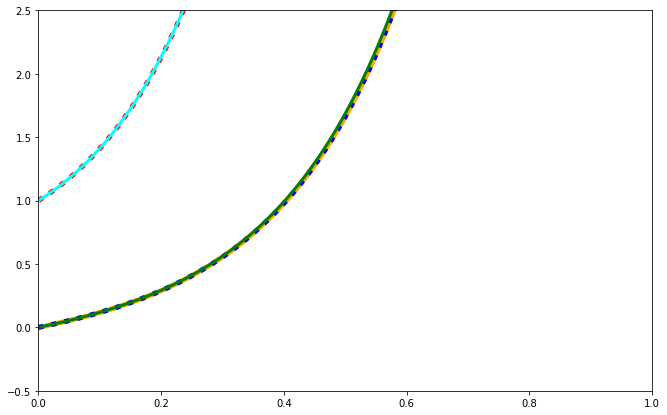

In [17]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sympy import *
from sympy import lambdify

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph



# Approximate Function using Heun's or Euler's Method
f = lambda t, y, v: 3*v + 10*y
data = heuns_method(f, dt = 0.005, y0 = 0, v0 = 1, t0 = 0, i = 400)

ax.plot(data[:, 0], data[:, 1], color='orange', linewidth=5)



# Interpolate Function using Polynomials
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg =30)  # polynomial degree (number of coefficients)
y = np.polyval(c, data[:, 0])

ax.plot(data[:, 0], y, color='blue', linestyle=':', linewidth=5)



# Interpolate First Derivative of Function
c = np.polyfit(x = data[:, 0],
               y = data[:, 2],
               deg =30)
y = np.polyval(c, data[:, 0])

ax.plot(data[:, 0], y, color='red', linestyle=':', linewidth=5)





# Plot the provided solution
f = lambda x: (1/7)*(np.exp(5*x)-np.exp(-2*x))
x__ = np.linspace(0, 1, 201)

ax.plot(x__, f(x__), color='green', linewidth=3)



# Plot Derivative of the provided solution
X = Symbol('X')
f = lambdify(X, ((1/7)*(E**(5*X)-E**(-2*X))).diff(X), 'numpy')
x__ = np.linspace(0, 1, 201)

ax.plot(x__, f(x__), color='cyan', linewidth=3)




ax.set_xlim(0, 1)
ax.set_ylim(-0.5, 2.5)

plt.show()

Clearly the approximated function (orange), its interpolated polynomial function (blue dots) and the actual solution curve (green) are all very close. Likewise, its interpolated derivative (red) and its actual derivative (cyan) are precisely aligned.

### Solving Non-Homogenous 2nd order LODEs Numerically

$$y″ - 3y′ - 10y = e^x$$ $$y(0) = 0$$  $$y′(0) = 1$$

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:26: RankWarning: Polyfit may be poorly conditioned
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned


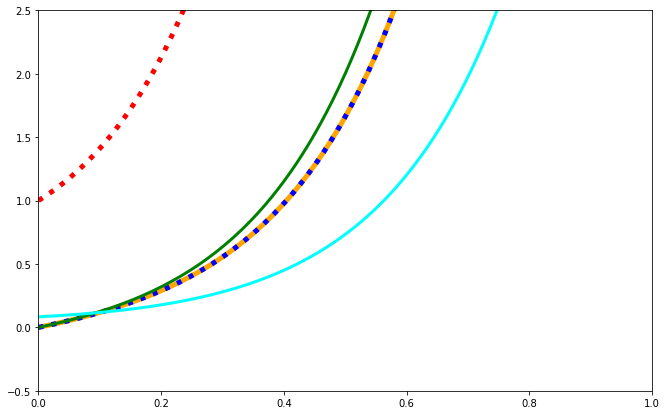

In [10]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sympy import *
from sympy import lambdify

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph



# Approximate Function using Heun's or Euler's Method
f = lambda t, y, v: 3*v + 10*y
data = heuns_method(f, dt = 0.005, y0 = 0, v0 = 1, t0 = 0, i = 400)

ax.plot(data[:, 0], data[:, 1], color='orange', linewidth=5)



# Interpolate Function using Polynomials
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg =30)  # polynomial degree (number of coefficients)
y = np.polyval(c, data[:, 0])

ax.plot(data[:, 0], y, color='blue', linestyle=':', linewidth=5)



# Interpolate First Derivative of Function
c = np.polyfit(x = data[:, 0],
               y = data[:, 2],
               deg =30)
y = np.polyval(c, data[:, 0])

ax.plot(data[:, 0], y, color='red', linestyle=':', linewidth=5)





# Plot the provided solution
f = lambda x: (1/84)*np.exp(-2*x)*(-8-7*np.exp(3*x)+15*np.exp(7*x))
x__ = np.linspace(0, 1, 201)

ax.plot(x__, f(x__), color='green', linewidth=3)



# Plot Derivative of the provided solution
X = Symbol('X')
f = lambdify(X, ((1/84)*(E**(5*X)-E**(-2*X))).diff(X), 'numpy')
x__ = np.linspace(0, 1, 201)

ax.plot(x__, f(x__), color='cyan', linewidth=3)




ax.set_xlim(0, 1)
ax.set_ylim(-0.5, 2.5)

plt.show()

### Problem: A Simple Pendulum (success)

__This gives a better fit than mathematica... yay!__

http://calculuslab.deltacollege.edu/ODE/7-A-2/7-A-2-h.html

The equation describing the modion of a simple pendulum is given by:

$$y'' + \frac{g}{L}sin(y)=0$$
$$y(0) = y_0$$
$$y'(0) = v_0$$
Where: 
<br />
$y =$ angle of displacement (a function of time, $t$, yet to be determined)<br />
$L =$ length of the pendulum<br />
$g =$ acceleration due to gravity<br />
$y_0 =$ initial angle of displacement<br />
$v_0 =$ initial angular velocity <br /><br />

Also, $y = 0$ corresponds to hanging straight down, and a counterclockwise displacement from vertical is considered positive.

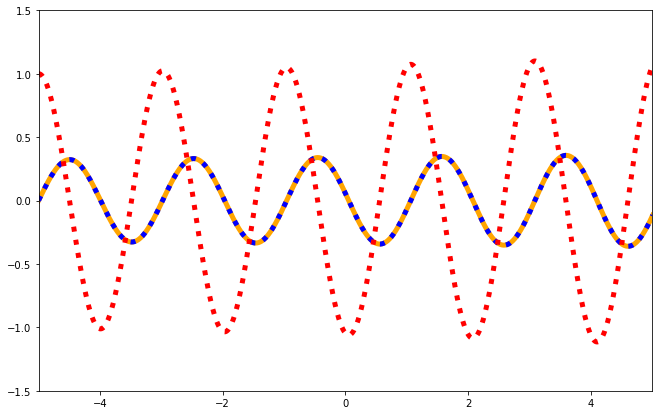

In [32]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sympy import *
from sympy import lambdify

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph

g = 9.8
L = 1

# Approximate Function using Heun's or Euler's Method
f = lambda t, y, v: -(g/L)*np.sin(y)
data = heuns_method(f, dt = 0.005, y0 = 0, v0 = 1, t0 = -5, i = 2000)

ax.plot(data[:, 0], data[:, 1], color='orange', linewidth=5)



# Interpolate Function using Polynomials
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg =30)  # polynomial degree (number of coefficients)
y = np.polyval(c, data[:, 0])

ax.plot(data[:, 0], y, color='blue', linestyle=':', linewidth=5)



# Interpolate First Derivative of Function
c = np.polyfit(x = data[:, 0],
               y = data[:, 2],
               deg =30)
y = np.polyval(c, data[:, 0])

ax.plot(data[:, 0], y, color='red', linestyle=':', linewidth=5)





ax.set_xlim(-5, 5)
ax.set_ylim(-1.5, 1.5)

plt.show()

### Problem: Hanging Wire (Success)

http://calculuslab.deltacollege.edu/ODE/7-A-1/7-A-1-h.html

The equation for the shape of a hanging wire is given by:

$$\frac{\partial^2y }{\partial x^2} = \frac{w}{|\vec T_Q|} (1+({dy}/{dx})^2)^{\frac{1}{2}}$$

$$y(0) = 0$$ $$y'(0) = 0$$

Where $\vec T_Q = 40$ is the tension vector, the horizaontal tension of the wire at its lowest point.

$w = 0.5$

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:26: RankWarning: Polyfit may be poorly conditioned
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:46: RankWarning: Polyfit may be poorly conditioned


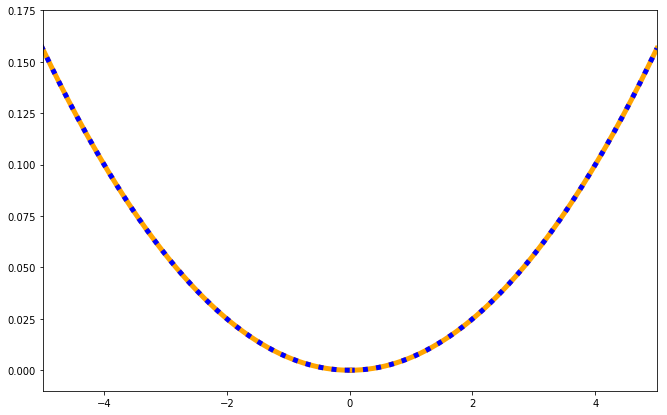

In [60]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sympy import *
from sympy import lambdify

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph

w = 0.5
T = 40

# POSITIVE HALF
# Approximate Function using Heun's or Euler's Method
f = lambda t, y, v: (w/abs(T)) * np.sqrt((1 + v**2))
data = heuns_method(f, dt = 0.005, y0 = 0, v0 = 0, t0 = 0, i = 2000)

ax.plot(data[:, 0], data[:, 1], color='orange', linewidth=5)

# Interpolate Function using Polynomials
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg =30)  # polynomial degree (number of coefficients)
y = np.polyval(c, data[:, 0])

ax.plot(data[:, 0], y, color='blue', linestyle=':', linewidth=5)




# NEGATIVE HALF
# Approximate Function using Heun's or Euler's Method
f = lambda t, y, v: (w/abs(T)) * np.sqrt((1 + v**2))
data = heuns_method(f, dt = 0.005, y0 = 0, v0 = 0, t0 = 0, i = 2000)

ax.plot(-data[:, 0], data[:, 1], color='orange', linewidth=5)


# Interpolate Function using Polynomials
    ## Polynomial Coefficients
c = np.polyfit(x = data[:, 0],   # x-values
               y = data[:, 1],   # y-values
               deg =30)  # polynomial degree (number of coefficients)
y = np.polyval(c, data[:, 0])

ax.plot(-data[:, 0], y, color='blue', linestyle=':', linewidth=5)





ax.set_xlim(-5, 5)
ax.set_ylim(-0.01, 0.175)

plt.show()

### Problem: Compartmental Analysis

http://calculuslab.deltacollege.edu/ODE/7-A-5/7-A-5-h.html

__The Example__
*A large tank initially holds 400 gallons of water into which 1600 pounds of a certain salt has been dissolved. An inflow pipe brings in water containing 2 pounds of the same salt per gallon at a rate of 5 gallons per minute. An outflow pipe allows the fully mixed fluid in the tank to exit at the same rate of 5 gallons per minute. Find the initial value problem that models the amount of the salt, y, in the tank at time t.*

__The Resulting Problem:__
$$input  rate = 10$$
$$output rate = y/80$$

$$dy/dt = 10 - y/80$$

$$y(0) = 1600$$

In [1]:
def heuns_method(f, dt, y0, t0, i):
    n = 0; data = [[t0, y0]]
    while n <= i:
        n+=1
        t = data[n-1][0]
        y = data[n-1][1]
        dy = (dt/2)*(f(t, y) + f(t+dt, y+dt*f(t, y)))
        data.append([t + dt, y + dy])
    return np.asarray(data)

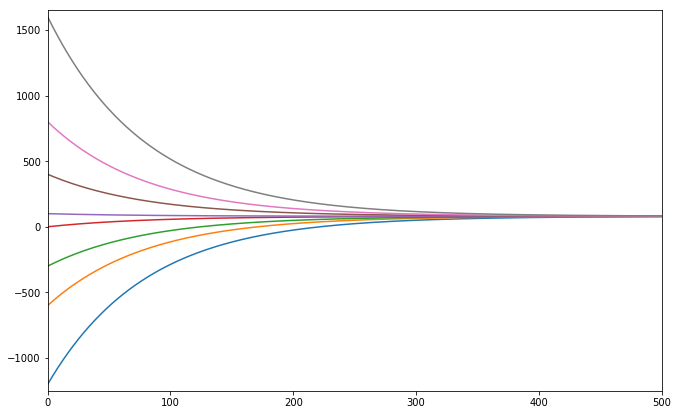

In [18]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(num=1, figsize=(11,7))
ax = fig.add_subplot(111) # all sub-plots on same graph

f = lambda x, y: 1-y/80

for i in [-1200, -600, -300, 0, 100, 400, 800, 1600]:
    data = heuns_method(f, dt=0.1, y0=i, t0=0, i=10000)

    ax.plot(data[:, 0], data[:, 1])
    ax.set_xlim(0, 500)
    ax.set_ylim(-1250, 1650)

plt.show()